In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = filtered_data

# Exclude non-target and specific columns
exclude_columns = ['C_LAST', 'DTE', 'QUOTE_DATE', 'EXPIRE_DATE']  # Update as per the dataset
feature_columns = df.columns.difference(exclude_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_columns], df['C_LAST'], test_size=0.2, random_state=42)

# Identify skewed columns and apply log transformation to these columns in the training set
skew_columns = ['C_IV', 'C_DELTA', 'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO']  # Example columns, adjust as needed
skew_columns = [col for col in skew_columns if col in feature_columns]  # Ensure skew_columns are in features
for col in skew_columns:
    min_positive = X_train[col][X_train[col] > 0].min()
    X_train[col] = X_train[col].replace(0, min_positive * 0.1)
    X_train[col] = X_train[col].apply(lambda x: min_positive * 0.1 if x <= 0 else x)
    X_train[col + '_log'] = np.log(X_train[col])
    X_test[col] = X_test[col].replace(0, min_positive * 0.1)
    X_test[col] = X_test[col].apply(lambda x: min_positive * 0.1 if x <= 0 else x)
    X_test[col + '_log'] = np.log(X_test[col])

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))  # Scale only numeric columns
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate the mean squared errors
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Print the performance metrics
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")

C:\Users\reach\AppData\Local\Temp\ipykernel_7672\3286984868.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = X_train[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
C:\Users\reach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
C:\Users\reach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [ 7 ,9,11],
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [400,500,700],
    'subsample': [0.5,0.6,0.7,0.8],
    'colsample_bytree': [0.2,0.3, 0.5]
}

xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled[numerical_columns], y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.5; total time=   0.8s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.5; total time=   0.7s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.2, learning_rate=0.01, max_depth=7, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END 

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 4]     # Minimum number of data points allowed in a leaf node
}

# Create a RandomForest Regressor
rf = RandomForestRegressor(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
# Execute the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2: ", r2)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score found:  102.00922619177881
Test MSE:  89.29951908586487
Test R^2:  0.9906145464836195


RIDGE REGRESSION

REGULARISATION

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

# Feature selection using RFE
selector = RFECV(LinearRegression(), step=1, cv=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Re-train models with selected features
linear_regression.fit(X_train_selected, y_train)
y_test_pred = linear_regression.predict(X_test_selected)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Using Lasso Regression as it includes L1 regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_test_pred_lasso = lasso.predict(X_test_scaled)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Output new results
print("Updated Linear Regression Test MSE:", test_mse)
print("Updated Linear Regression Test R²:", test_r2)
print("Lasso Regression Test MSE:", test_mse_lasso)
print("Lasso Regression Test R²:", test_r2_lasso)

# Adjust Random Forest settings to avoid overfitting
random_forest_adjusted = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)
random_forest_adjusted.fit(X_train_scaled, y_train)
y_test_pred_rf_adjusted = random_forest_adjusted.predict(X_test_scaled)
test_mse_rf_adjusted = mean_squared_error(y_test, y_test_pred_rf_adjusted)
test_r2_rf_adjusted = r2_score(y_test, y_test_pred_rf_adjusted)

# Output results
print("Adjusted Random Forest Test MSE:", test_mse_rf_adjusted)
print("Adjusted Random Forest Test R²:", test_r2_rf_adjusted)



Updated Linear Regression Test MSE: 6135.736697417666
Updated Linear Regression Test R²: 0.35512898443504726
Lasso Regression Test MSE: 6147.930890459134
Lasso Regression Test R²: 0.3538473646331486
Adjusted Random Forest Test MSE: 620.2558121417608
Adjusted Random Forest Test R²: 0.934810599735438


In [35]:
random_forest = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_leaf=2, min_samples_split=4, random_state=42)
random_forest.fit(X_train_scaled, y_train)
predictions = random_forest.predict(X_test_scaled)

# Calculating new MSE and R²
new_mse = mean_squared_error(y_test, predictions)
new_r2 = r2_score(y_test, predictions)

print("New MSE: ", new_mse)
print("New R²: ", new_r2)


New MSE:  103.7029649105353
New R²:  0.9891007323819649


# overfitting checks

<module 'matplotlib.pyplot' from 'C:\\Users\\reach\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

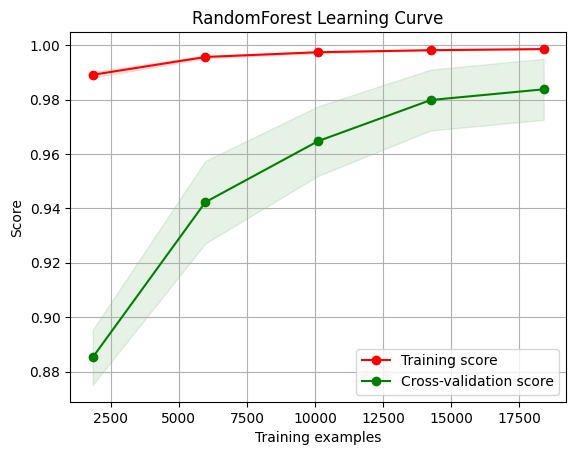

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming 'Date_Column' is the name of your date feature
X = call_options_data[numerical_columns]

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
plot_learning_curve(model, "RandomForest Learning Curve", X, y, cv=5)


The learning curve you've provided represents the performance of a RandomForest model on both the training set (red line) and the validation set (green line) as the number of training examples increases.

Here's how to interpret the graph:

1. **Training Score (Red Line)**: The training score starts very high, close to 1, which is typical for RandomForest models since they can easily memorize the training data, especially when the number of examples is small. As more examples are added, the training score slightly decreases, which is normal as the model starts to see more varied data, making it harder to fit perfectly to all training examples.

2. **Cross-validation Score (Green Line)**: The cross-validation score is lower than the training score at the beginning, indicating the model doesn't generalize as well to unseen data. However, as more training data is provided, the cross-validation score increases, suggesting that the model is learning and improving its generalization. The shaded area around the green line represents the variability (confidence interval) of the cross-validation score across different folds; the smaller the area, the more confident you can be in the cross-validation score.

3. **Convergence of Scores**: Towards the right end of the graph, both the training and cross-validation scores converge, and the gap between them narrows, which suggests that adding more data is leading to better generalization. If the model was overfitting, you'd see a persistently large gap between the training and cross-validation scores.

4. **Plateau of Scores**: Both lines plateau towards the right, which suggests that adding more training examples beyond this point may not lead to significant improvements in the model's performance. The model has reached its performance limit given the current feature set and model complexity.

In summary, this learning curve suggests a well-fitting model that is not overfitting and is generalizing well to new data. However, since the scores are very high, you might want to investigate if the problem is too easy, or if there's a data leak, or if the model is too complex and memorizing the data. It's always a good practice to validate model performance with a separate test set not used during the cross-validation process.

plot of xgregressor 

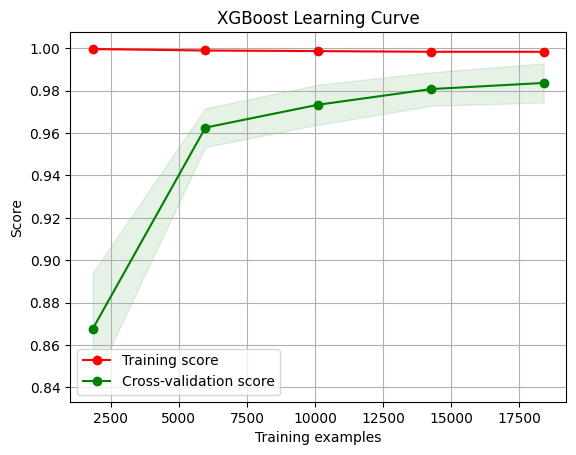

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
import numpy as np

# Assuming 'X' and 'y' are the features and target variable arrays respectively
# and have been defined previously in the conversation where the data was loaded and prepared

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage for XGBoost Regressor
xgb_model = XGBRegressor()
plot_learning_curve(xgb_model, "XGBoost Learning Curve", X, y, cv=5)

plt.show()  # Display the plot



plot of linear regresion

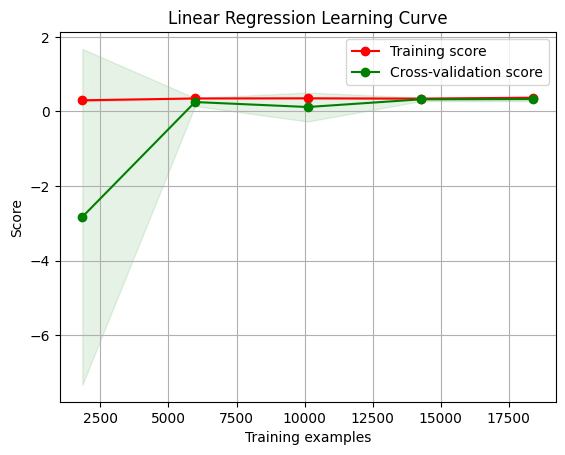

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming X and y are already defined and preprocessed:
# X -> feature matrix
# y -> target variable

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage:
model = LinearRegression()
plot_learning_curve(model, "Linear Regression Learning Curve", X, y, cv=5)

# Display plot
plt.show()


# feature importance

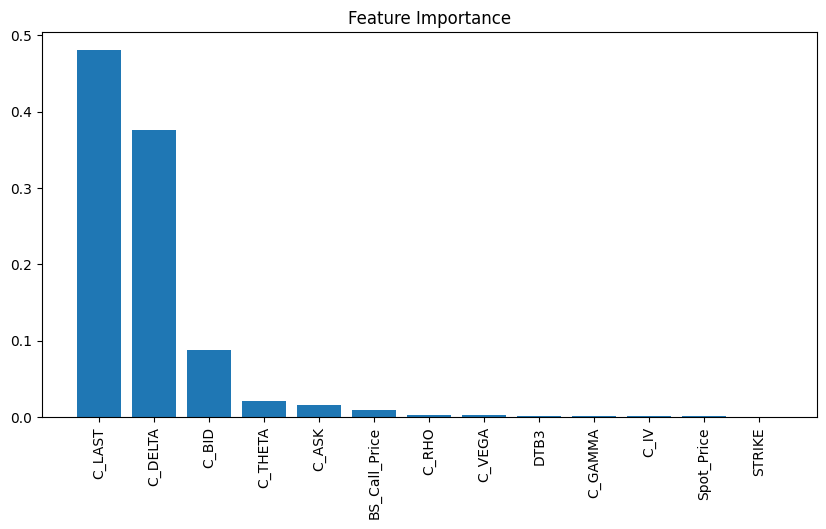

In [25]:
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = random_forest_regularized.feature_importances_
indices = np.argsort(importances)[::-1]
names = [numerical_columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train[numerical_columns].shape[1]), importances[indices])
plt.xticks(range(X_train[numerical_columns].shape[1]), names, rotation=90)
plt.show()
